In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Install libraries yang diperlukan
!pip install -q tensorflow pandas numpy matplotlib seaborn scikit-learn pillow opencv-python

# 3. Import semua libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print("✅ Setup berhasil!")

Mounted at /content/drive
✅ Setup berhasil!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/


'110_Muhammad Annur Akbar_WIRTEK'
'110_MuhAnnurAkbar_Posttest3_BasisData (1).gdoc'
 110_MuhAnnurAkbar_Posttest3_BasisData.gdoc
'110_MUH ANNUR AKBAR_PROJEK 2 '
 1619692980244837429365691122691.jpg
'1970-01-01 08.00.00 2.jpg'
'2019-06-21 08.57.06 1.jpg'
'2309106110_MUHAMMAD ANNUR AKBAR'
'2309106110_MUHAMMAD ANNUR AKBAR (1)'
'2309106110_MUHAMMAD ANNUR AKBAR (2)'
"2309106110_Muhammad_Annur_Akbar_C'23"
"2309106110_MUHAMMAD ANNUR AKBAR C'23"
'2309106110_MUHAMMAD_ANNUR_AKBAR_JK6.zip (Unzipped Files)'
 2309106110_MuhammadAnnurAkbar.pdf
 2309106110_MUHAMMAD_ANNUR_AKBAR_POSTTEST4.gdoc
'2309106110_MuhammadAnnurAkbar_POSTTEST5 (1).gdoc'
 2309106110_MuhammadAnnurAkbar_POSTTEST5.gdoc
'2309106110_MUHAMMAD ANNUR AKBAR_POSTTEST6.rar'
'2309106110 MUHAMMAD ANNUR AKBAR PRAKTIKUM AGAMA ISLAM.docx'
'2309106110_MuhAnnurAkbar (1).pdf'
 2309106110_MuhAnnurAkbar_DFD2.gdoc
 2309106110_MuhAnnurAkbar.pdf
 2309106110_MuhAnnurAkbar_PEMVIS
'2309106110_MuhAnnurAkbar_PO3 (1).rtf.gdoc'
 2309106110_MuhAnnurAkbar_PO3.rtf.

In [ ]:
import os

dataset_path = "/content/drive/MyDrive/pa_kb/archive (3)"

if os.path.exists(dataset_path):
    print("✅ Dataset ditemukan!")
    print(f"📁 Isi folder: {os.listdir(dataset_path)}")
else:
    print("❌ Dataset tidak ditemukan. Cek path Anda!")


✅ Dataset ditemukan!
📁 Isi folder: ['test', 'train', 'augmented_dataset']


In [ ]:
for subdir in os.listdir(dataset_path):
    sub_path = os.path.join(dataset_path, subdir)
    print(f"\n📂 {subdir}:")
    print(os.listdir(sub_path))



📂 test:
['kencur', 'kunyit', 'jahe', 'lengkuas']

📂 train:
['jahe', 'kencur', 'kunyit', 'lengkuas']

📂 augmented_dataset:
['kencur', 'kunyit', 'lengkuas']


📊 STATISTIK DATASET:

Train: {'jahe': 70, 'kencur': 170, 'kunyit': 170, 'lengkuas': 168}
Test: {'kencur': 42, 'kunyit': 42, 'jahe': 18, 'lengkuas': 42}
Augmented: {'kencur': 840, 'kunyit': 840, 'lengkuas': 840}


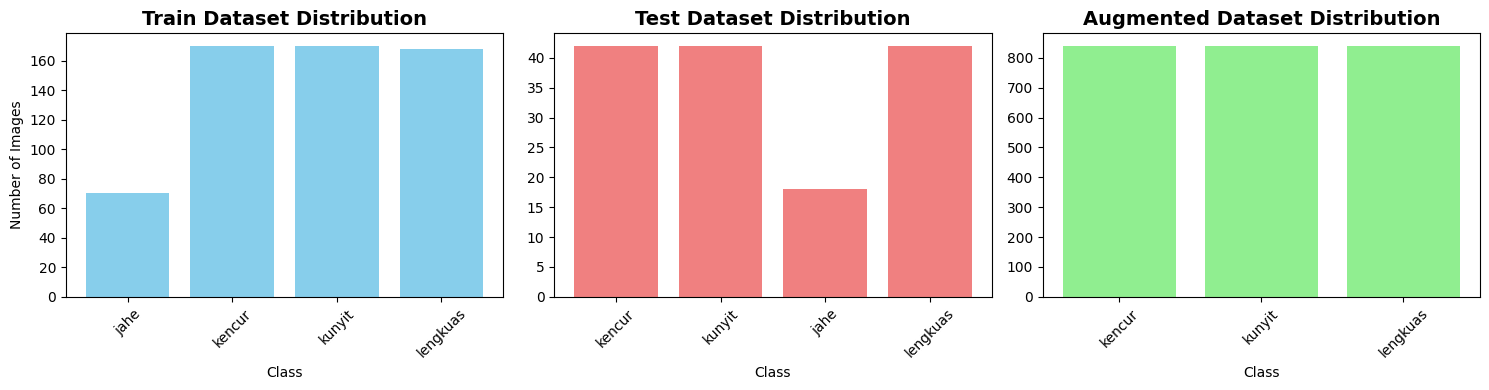


🖼️ Sample gambar dari Train Dataset:


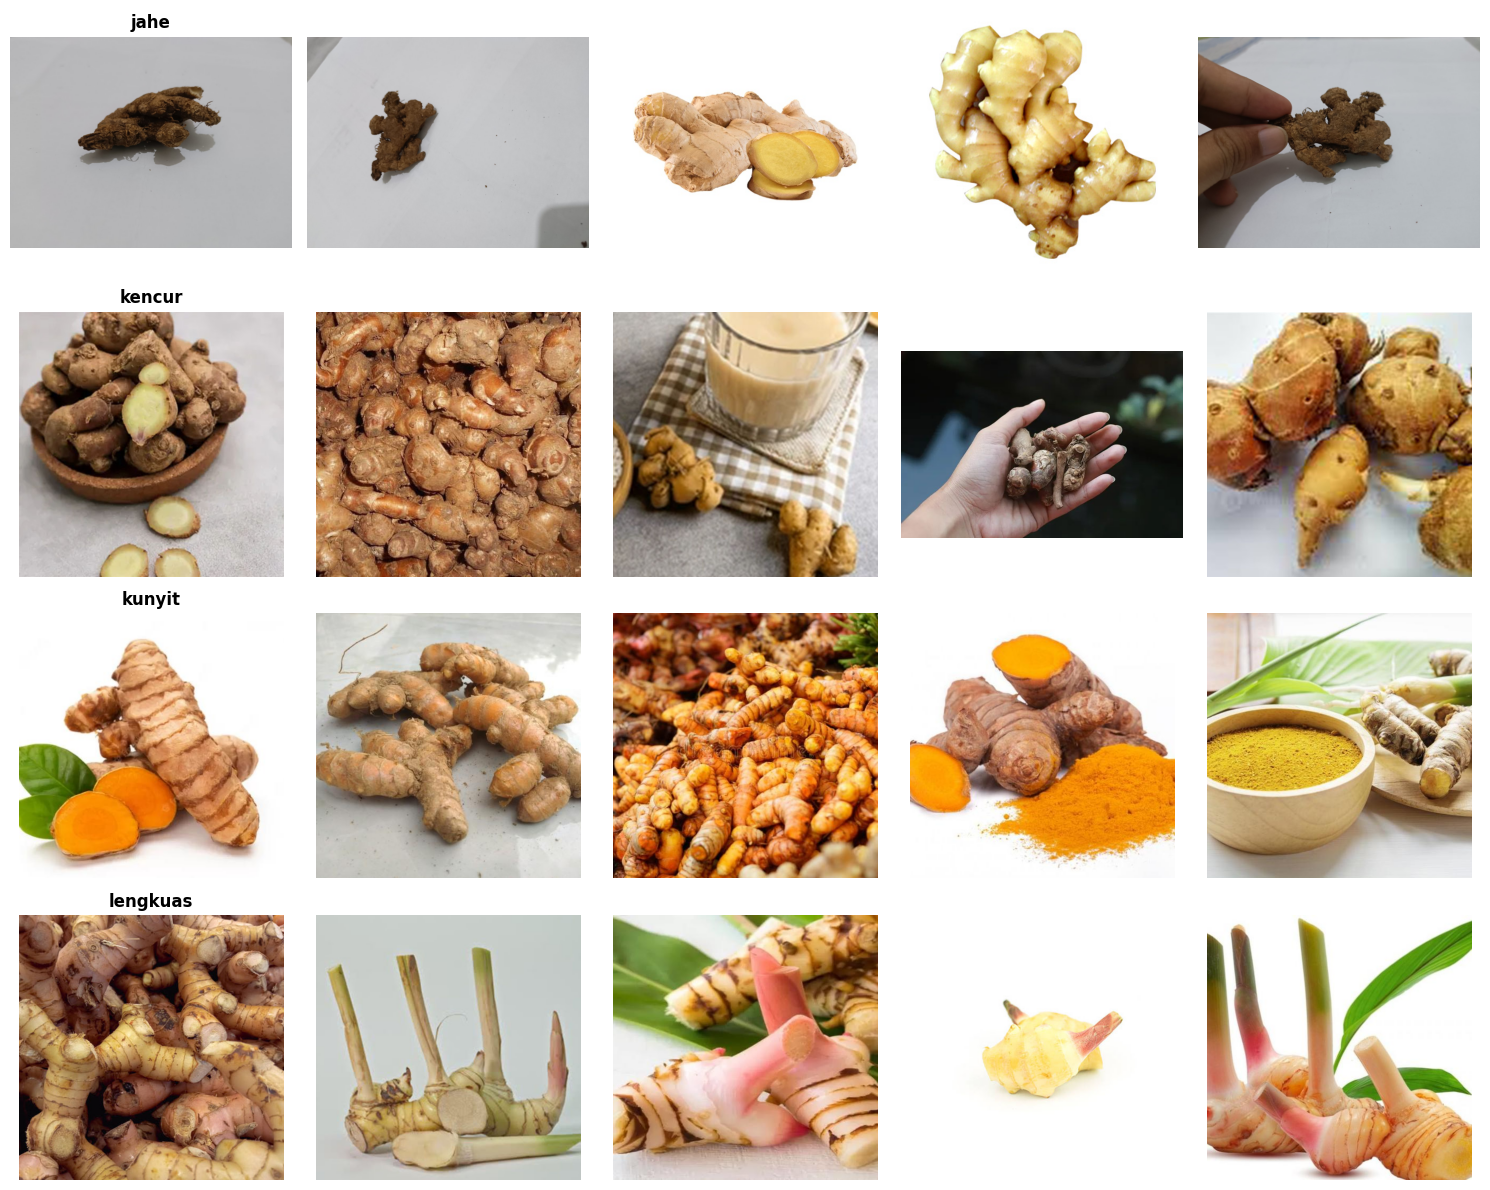

In [ ]:
# Set paths
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
augmented_path = os.path.join(dataset_path, "augmented_dataset")

# Fungsi untuk hitung jumlah gambar per kelas
def count_images(path):
    data = {}
    if not os.path.exists(path):
        print(f"⚠️ Path tidak ditemukan: {path}")
        return data

    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            num_images = len([f for f in os.listdir(class_path)
                            if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
            data[class_name] = num_images
    return data

# Hitung statistik
print("📊 STATISTIK DATASET:\n")
train_data = count_images(train_path)
test_data = count_images(test_path)
augmented_data = count_images(augmented_path)

print(f"Train: {train_data}")
print(f"Test: {test_data}")
print(f"Augmented: {augmented_data}")

# Visualisasi distribusi
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

if train_data:
    axes[0].bar(train_data.keys(), train_data.values(), color='skyblue')
    axes[0].set_title('Train Dataset Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Number of Images')
    axes[0].tick_params(axis='x', rotation=45)

if test_data:
    axes[1].bar(test_data.keys(), test_data.values(), color='lightcoral')
    axes[1].set_title('Test Dataset Distribution', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Class')
    axes[1].tick_params(axis='x', rotation=45)

if augmented_data:
    axes[2].bar(augmented_data.keys(), augmented_data.values(), color='lightgreen')
    axes[2].set_title('Augmented Dataset Distribution', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Class')
    axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Tampilkan sample gambar
def show_sample_images(path, num_samples=5):
    if not os.path.exists(path):
        print(f"⚠️ Path tidak ditemukan: {path}")
        return

    classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    if not classes:
        print("⚠️ Tidak ada kelas ditemukan")
        return

    fig, axes = plt.subplots(len(classes), num_samples, figsize=(15, 3*len(classes)))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(path, class_name)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        for j in range(min(num_samples, len(images))):
            img_path = os.path.join(class_path, images[j])
            img = Image.open(img_path)

            if len(classes) > 1:
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                if j == 0:
                    axes[i, j].set_title(f'{class_name}', fontsize=12, fontweight='bold')
            else:
                axes[j].imshow(img)
                axes[j].axis('off')
                if j == 0:
                    axes[j].set_title(f'{class_name}', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

print("\n🖼️ Sample gambar dari Train Dataset:")
show_sample_images(train_path, num_samples=5)

🧹 MEMULAI DATA CLEANING...


📊 HASIL CLEANING:
   Total images checked: 3242
   Corrupt images found: 0
   Valid images: 3242
🔄 Duplicate found:
   Original: /content/drive/MyDrive/pa_kb/archive (3)/test/lengkuas/lengkuas_114.jpg
   Duplicate: /content/drive/MyDrive/pa_kb/archive (3)/test/lengkuas/lengkuas_47.jpg
   ✅ Deleted duplicate

🔄 Duplicate found:
   Original: /content/drive/MyDrive/pa_kb/archive (3)/train/jahe/jahe_162.jpg
   Duplicate: /content/drive/MyDrive/pa_kb/archive (3)/train/jahe/jahe_100.jpg
   ✅ Deleted duplicate

🔄 Duplicate found:
   Original: /content/drive/MyDrive/pa_kb/archive (3)/train/kencur/kencur_86.jpg
   Duplicate: /content/drive/MyDrive/pa_kb/archive (3)/train/kencur/kencur_85.jpg
   ✅ Deleted duplicate

🔄 Duplicate found:
   Original: /content/drive/MyDrive/pa_kb/archive (3)/train/kunyit/kunyit_89.jpg
   Duplicate: /content/drive/MyDrive/pa_kb/archive (3)/train/kunyit/kunyit_78.jpg
   ✅ Deleted duplicate

🔄 Duplicate found:
   Original: /content/drive/My

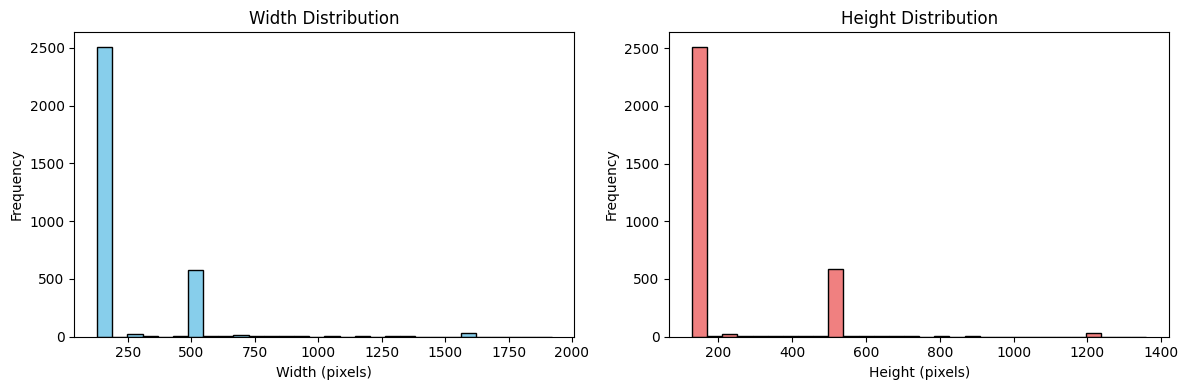


✅ DATA CLEANING SELESAI!

Ringkasan:
1. Corrupt images removed: 0
2. Duplicate images removed: 15
3. Image sizes analyzed: ✓

🎯 Dataset siap untuk preprocessing!


In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

print("🧹 MEMULAI DATA CLEANING...\n")

# HANDLING CORRUPT/INVALID IMAGES
def check_and_clean_images(dataset_path):
    """
    Cek dan hapus gambar yang rusak atau tidak valid
    """
    corrupt_images = []
    total_images = 0

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                total_images += 1
                file_path = os.path.join(root, file)

                try:
                    img = Image.open(file_path)
                    img.verify()
                    img = Image.open(file_path)
                    img.load()

                    if img.size[0] == 0 or img.size[1] == 0:
                        raise Exception("Invalid dimensions")

                    if img.mode not in ['RGB', 'L', 'RGBA']:
                        img = img.convert('RGB')
                        img.save(file_path)

                except Exception as e:
                    print(f"❌ Corrupt image found: {file_path}")
                    print(f"   Error: {str(e)}")
                    corrupt_images.append(file_path)

                    try:
                        os.remove(file_path)
                        print(f"   ✅ Deleted corrupt image")
                    except:
                        print(f"   ⚠️ Failed to delete")

    print(f"\n📊 HASIL CLEANING:")
    print(f"   Total images checked: {total_images}")
    print(f"   Corrupt images found: {len(corrupt_images)}")
    print(f"   Valid images: {total_images - len(corrupt_images)}")

    return corrupt_images

# Jalankan cleaning
corrupt_list = check_and_clean_images(dataset_path)


# HANDLING DUPLICATE IMAGES
def find_duplicate_images(dataset_path):
    """
    Cari gambar duplikat berdasarkan hash
    """
    import hashlib

    image_hashes = {}
    duplicates = []

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(root, file)

                try:
                    with open(file_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()

                    if file_hash in image_hashes:
                        duplicates.append((file_path, image_hashes[file_hash]))
                        print(f"🔄 Duplicate found:")
                        print(f"   Original: {image_hashes[file_hash]}")
                        print(f"   Duplicate: {file_path}")

                        os.remove(file_path)
                        print(f"   ✅ Deleted duplicate\n")
                    else:
                        image_hashes[file_hash] = file_path

                except Exception as e:
                    print(f"❌ Error processing {file_path}: {e}")

    print(f"\n📊 DUPLICATE DETECTION:")
    print(f"   Unique images: {len(image_hashes)}")
    print(f"   Duplicates found: {len(duplicates)}")

    return duplicates

# Jalankan duplicate detection
duplicates_list = find_duplicate_images(dataset_path)


# CHECK IMAGE SIZE DISTRIBUTION
def analyze_image_sizes(dataset_path):
    """
    Analisis distribusi ukuran gambar
    """
    widths, heights = [], []

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(root, file)
                try:
                    img = Image.open(file_path)
                    widths.append(img.size[0])
                    heights.append(img.size[1])
                except:
                    continue

    print(f"\n📏 IMAGE SIZE ANALYSIS:")
    print(f"   Width  - Min: {min(widths)}, Max: {max(widths)}, Avg: {np.mean(widths):.0f}")
    print(f"   Height - Min: {min(heights)}, Max: {max(heights)}, Avg: {np.mean(heights):.0f}")

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(widths, bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title('Width Distribution')
    axes[0].set_xlabel('Width (pixels)')
    axes[0].set_ylabel('Frequency')
    axes[1].hist(heights, bins=30, color='lightcoral', edgecolor='black')
    axes[1].set_title('Height Distribution')
    axes[1].set_xlabel('Height (pixels)')
    axes[1].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Jalankan analisis
analyze_image_sizes(dataset_path)


# SUMMARY DATA CLEANING
print("\n" + "="*50)
print("✅ DATA CLEANING SELESAI!")
print("="*50)
print("\nRingkasan:")
print(f"1. Corrupt images removed: {len(corrupt_list)}")
print(f"2. Duplicate images removed: {len(duplicates_list)}")
print(f"3. Image sizes analyzed: ✓")
print("\n🎯 Dataset siap untuk preprocessing!")


In [ ]:
# Parameter
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Test tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Info dataset
print(f"\n✅ Data berhasil di-load!")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")
print(f"Test samples: {test_generator.samples}")
print(f"Number of classes: {train_generator.num_classes}")
print(f"Class indices: {train_generator.class_indices}")

Found 463 images belonging to 4 classes.
Found 115 images belonging to 4 classes.
Found 144 images belonging to 4 classes.

✅ Data berhasil di-load!
Training samples: 463
Validation samples: 115
Test samples: 144
Number of classes: 4
Class indices: {'jahe': 0, 'kencur': 1, 'kunyit': 2, 'lengkuas': 3}


In [ ]:
# Build Model dengan Transfer Learning
def build_transfer_model(input_shape, num_classes):
    base_model = MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )

    # Freeze base model
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    return model

# Build & compile
input_shape = (224, 224, 3)
num_classes = train_generator.num_classes

model = build_transfer_model(input_shape, num_classes)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,948 (9.87 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Setup callbacks
checkpoint_path = "/content/drive/MyDrive/pa_kb/models/best_model.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        checkpoint_path,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        verbose=1
    )
]

# Training
EPOCHS = 50

print("🚀 Memulai training...")
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

# Save final model
final_model_path = "/content/drive/MyDrive/pa_kb/models/final_model.h5"
model.save(final_model_path)
print(f"✅ Model berhasil disimpan di: {final_model_path}")

🚀 Memulai training...
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4881 - loss: 1.3871
Epoch 1: val_accuracy improved from -inf to 0.78261, saving model to /content/drive/MyDrive/pa_kb/models/best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.4936 - loss: 1.3717 - val_accuracy: 0.7826 - val_loss: 0.4995 - learning_rate: 0.0010
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.8251 - loss: 0.4752
Epoch 2: val_accuracy improved from 0.78261 to 0.91304, saving model to /content/drive/MyDrive/pa_kb/models/best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 704ms/step - accuracy: 0.8264 - loss: 0.4745 - val_accuracy: 0.9130 - val_loss: 0.2880 - learning_rate: 0.0010
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8939 - loss: 0.3257
Epoch 3: val_accuracy improved from 0.91304 to 0.92174, saving model to /content/drive/MyDrive/pa_kb/models/best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 685ms/step - accuracy: 0.8924 - loss: 0.3281 - val_accuracy: 0.9217 - val_loss: 0.2326 - learning_rate: 0.0010
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.8913 - loss: 0.2737
Epoch 4: val_accuracy improved from 0.92174 to 0.93043, saving model to /content/drive/MyDrive/pa_kb/models/best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 628ms/step - accuracy: 0.8913 - loss: 0.2747 - val_accuracy: 0.9304 - val_loss: 0.2141 - learning_rate: 0.0010
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.8959 - loss: 0.2755
Epoch 5: val_accuracy did not improve from 0.93043
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 695ms/step - accuracy: 0.8961 - loss: 0.2763 - val_accuracy: 0.9130 - val_loss: 0.2883 - learning_rate: 0.0010
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.9225 - loss: 0.2370
Epoch 6: val_accuracy did not improve from 0.93043
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 663ms/step - accuracy: 0.9217 - loss: 0.2380 - val_accuracy: 0.9043 - val_loss: 0.2419 - learning_rate: 0.0010
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.9393 - loss: 0.2094
Epoch 7: val_accuracy did not improve from 0.93043

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 644ms/step - accuracy: 0.9390 - loss: 0.2098 - val_accur

✅ Model berhasil disimpan di: /content/drive/MyDrive/pa_kb/models/final_model.h5


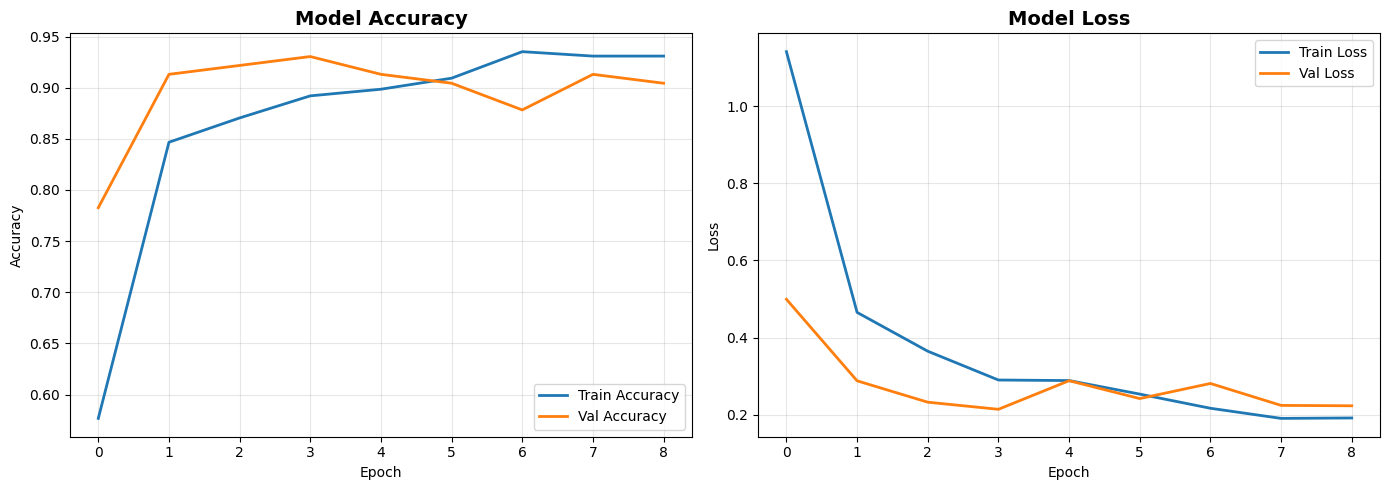


📊 Evaluasi Model pada Test Set:
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 12s/step - accuracy: 0.9094 - loss: 0.3370
Test Accuracy: 92.36%
Test Loss: 0.2708
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


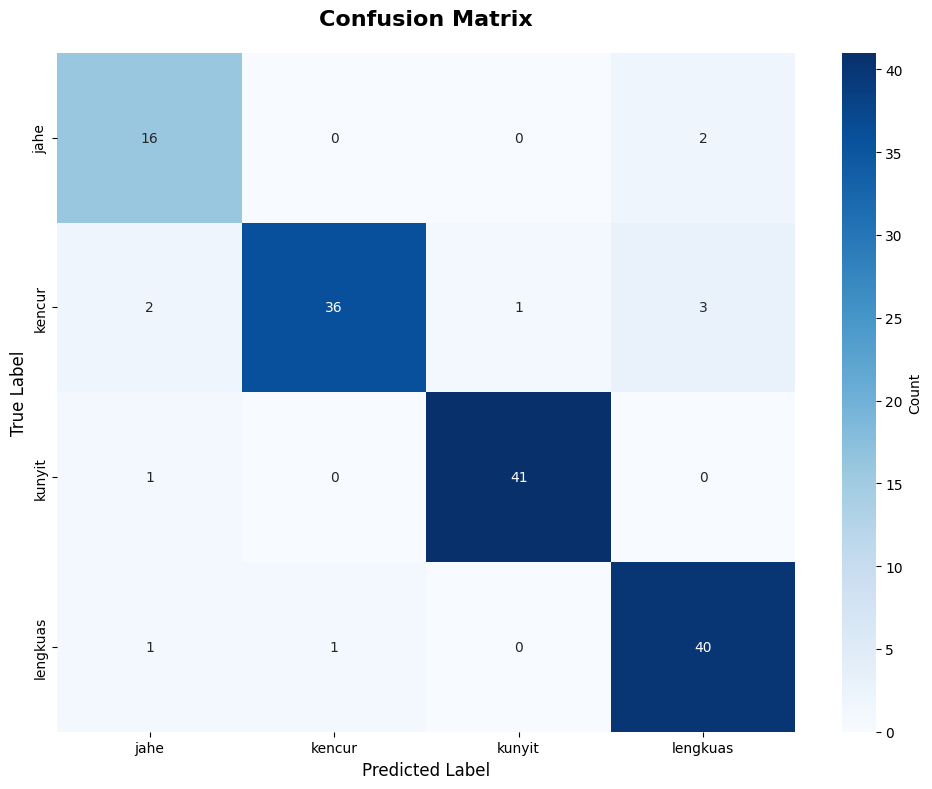


📋 Classification Report:
              precision    recall  f1-score   support

        jahe       0.80      0.89      0.84        18
      kencur       0.97      0.86      0.91        42
      kunyit       0.98      0.98      0.98        42
    lengkuas       0.89      0.95      0.92        42

    accuracy                           0.92       144
   macro avg       0.91      0.92      0.91       144
weighted avg       0.93      0.92      0.92       144



In [ ]:
# Plot training history
def plot_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy
    axes[0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
    axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Loss
    axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/pa_kb/results/training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

os.makedirs('/content/drive/MyDrive/pa_kb/results', exist_ok=True)
plot_history(history)

# Evaluasi test set
print("\n📊 Evaluasi Model pada Test Set:")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Confusion Matrix
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()),
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/pa_kb/results/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred,
                          target_names=list(test_generator.class_indices.keys())))


🔍 ANALISIS OVERFITTING

📊 METRICS COMPARISON:
   Train Accuracy: 93.09%
   Val Accuracy:   90.43%
   Accuracy Gap:   2.65%

   Train Loss:     0.1917
   Val Loss:       0.2232
   Loss Gap:       0.0316

🔍 DIAGNOSIS:
   ✅ NO OVERFITTING! Model generalisasi dengan baik.


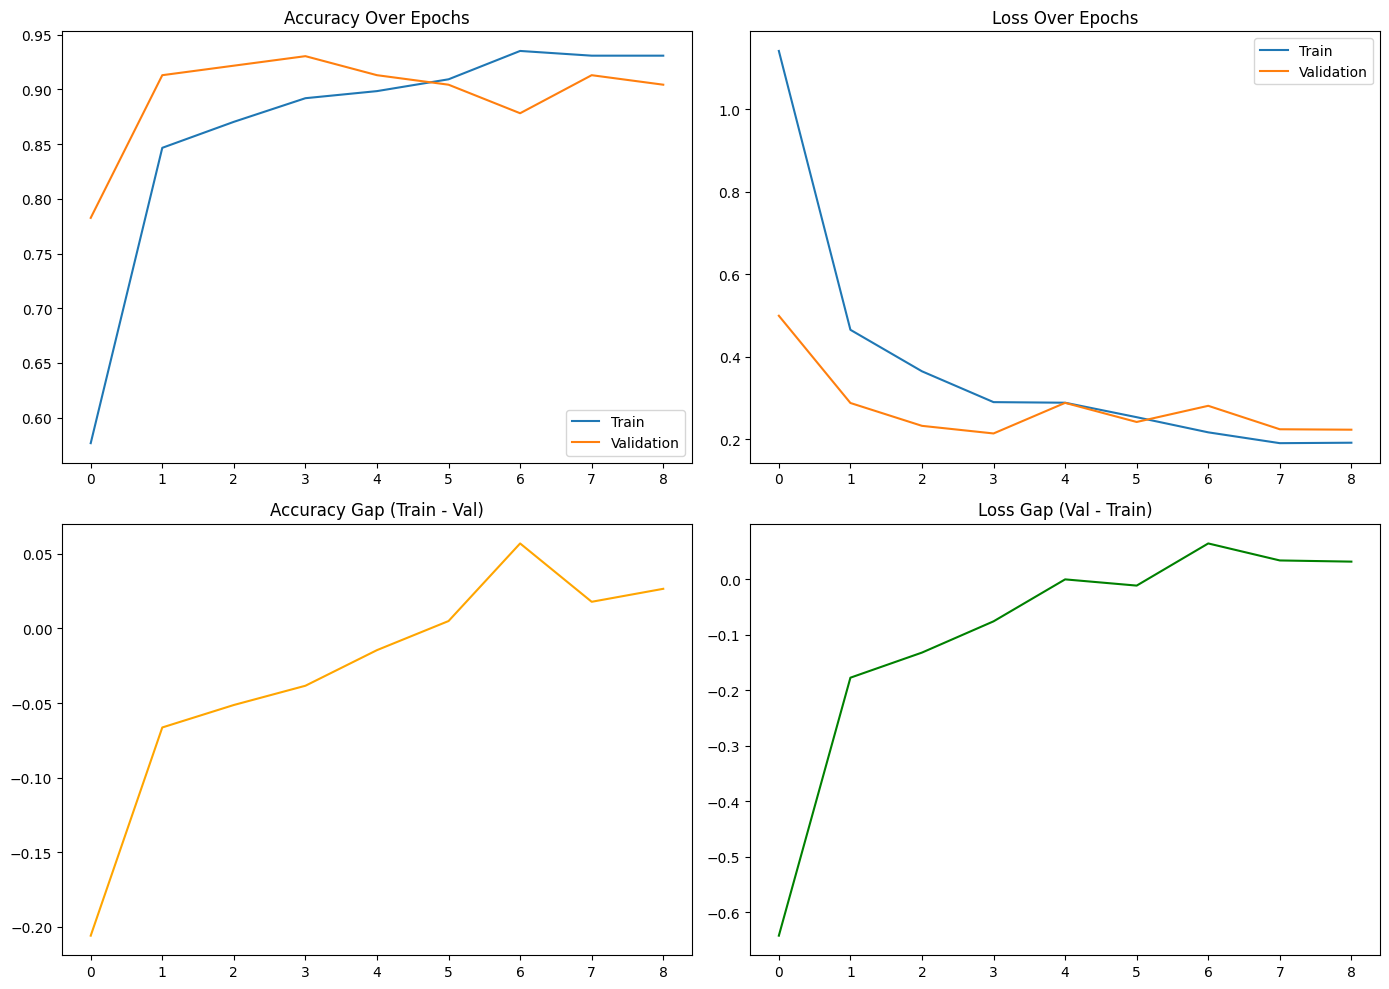


📊 TRAIN vs TEST COMPARISON:
   Train Accuracy: 93.09%
   Test Accuracy:  92.36%
   Difference:     0.73%

✅ Analysis report saved: /content/drive/MyDrive/pa_kb/results/analysis_report.json

✅ ANALISIS LENGKAP SELESAI!


In [ ]:
# STEP ANALISIS OVERFITTING

import matplotlib.pyplot as plt
import json
import os

print("\n" + "="*50)
print("🔍 ANALISIS OVERFITTING")
print("="*50)

def analyze_overfitting(history):
    """
    Analisis overfitting dari training history
    """
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    acc_gap = final_train_acc - final_val_acc
    loss_gap = final_val_loss - final_train_loss

    print("\n📊 METRICS COMPARISON:")
    print(f"   Train Accuracy: {final_train_acc*100:.2f}%")
    print(f"   Val Accuracy:   {final_val_acc*100:.2f}%")
    print(f"   Accuracy Gap:   {acc_gap*100:.2f}%")
    print()
    print(f"   Train Loss:     {final_train_loss:.4f}")
    print(f"   Val Loss:       {final_val_loss:.4f}")
    print(f"   Loss Gap:       {loss_gap:.4f}")

    print("\n🔍 DIAGNOSIS:")
    if acc_gap > 0.1:
        print("   ⚠️ OVERFITTING TERDETEKSI! Model terlalu fokus pada training data.")
        print("   💡 Solusi: Tambah dropout, augmentasi data, atau kurangi kompleksitas model.")
    elif acc_gap > 0.05:
        print("   ⚠️ SLIGHT OVERFITTING — masih bisa ditingkatkan dengan regularisasi ringan.")
    else:
        print("   ✅ NO OVERFITTING! Model generalisasi dengan baik.")

    if final_val_acc < 0.7:
        print("\n   ⚠️ UNDERFITTING MUNGKIN TERJADI — model belum cukup belajar.")

    # Plot hasil training
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes[0, 0].plot(history.history['accuracy'], label='Train')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation')
    axes[0, 0].set_title('Accuracy Over Epochs')
    axes[0, 0].legend()
    axes[0, 1].plot(history.history['loss'], label='Train')
    axes[0, 1].plot(history.history['val_loss'], label='Validation')
    axes[0, 1].set_title('Loss Over Epochs')
    axes[0, 1].legend()

    acc_gaps = [history.history['accuracy'][i] - history.history['val_accuracy'][i] for i in range(len(history.history['accuracy']))]
    axes[1, 0].plot(acc_gaps, color='orange')
    axes[1, 0].set_title('Accuracy Gap (Train - Val)')
    loss_gaps = [history.history['val_loss'][i] - history.history['loss'][i] for i in range(len(history.history['loss']))]
    axes[1, 1].plot(loss_gaps, color='green')
    axes[1, 1].set_title('Loss Gap (Val - Train)')

    plt.tight_layout()
    results_path = '/content/drive/MyDrive/pa_kb/results'
    os.makedirs(results_path, exist_ok=True)
    plt.savefig(f'{results_path}/overfitting_analysis.png', dpi=300)
    plt.show()

# Jalankan analisis (setelah training)
analyze_overfitting(history)

# Perbandingan Train vs Test
print("\n📊 TRAIN vs TEST COMPARISON:")
print(f"   Train Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"   Test Accuracy:  {test_accuracy*100:.2f}%")
print(f"   Difference:     {(history.history['accuracy'][-1] - test_accuracy)*100:.2f}%")

# Simpan laporan ke Drive
analysis_report = {
    'final_train_accuracy': float(history.history['accuracy'][-1]),
    'final_val_accuracy': float(history.history['val_accuracy'][-1]),
    'final_train_loss': float(history.history['loss'][-1]),
    'final_val_loss': float(history.history['val_loss'][-1]),
    'test_accuracy': float(test_accuracy),
    'test_loss': float(test_loss),
    'accuracy_gap': float(history.history['accuracy'][-1] - history.history['val_accuracy'][-1]),
    'total_epochs_trained': len(history.history['accuracy'])
}

report_path = '/content/drive/MyDrive/pa_kb/results/analysis_report.json'
with open(report_path, 'w') as f:
    json.dump(analysis_report, f, indent=4)

print(f"\n✅ Analysis report saved: {report_path}")
print("\n" + "="*50)
print("✅ ANALISIS LENGKAP SELESAI!")
print("="*50)


In [ ]:

# Mount Google Drive
from google.colab import drive
import os
import json

drive.mount('/content/drive')


# Path utama penyimpanan model
base_path = '/content/drive/MyDrive/pa_kb'
models_path = os.path.join(base_path, 'models')
os.makedirs(models_path, exist_ok=True)

print(f"📂 Folder penyimpanan model: {models_path}")


# Simpan model ke berbagai format
try:
    # 3.1 Format .h5 (yang biasa di pake)
    h5_path = os.path.join(models_path, 'model_cnn.h5')
    model.save(h5_path)
    print(f"✅ Model .h5 disimpan di: {h5_path}")

    # 3.2 Format .keras (format baru Keras 3.x)
    keras_model_path = os.path.join(models_path, 'model_for_api.keras')
    model.save(keras_model_path)
    print(f"✅ Model .keras disimpan di: {keras_model_path}")

    # 3.3 Format SavedModel (struktur folder)
    savedmodel_path = os.path.join(models_path, 'saved_model')
    model.save(savedmodel_path)  # format default = TensorFlow SavedModel
    print(f"✅ SavedModel disimpan di: {savedmodel_path}")

except Exception as e:
    print("❌ Gagal menyimpan model:", e)


# Simpan class indices (buat label ke angka)

if 'train_generator' in locals() or 'train_generator' in globals():
    class_indices_path = os.path.join(models_path, 'class_indices.json')
    try:
        with open(class_indices_path, 'w') as f:
            json.dump(train_generator.class_indices, f)
        print(f"✅ class_indices.json disimpan di: {class_indices_path}")
    except Exception as e:
        print("❌ Gagal menyimpan class_indices:", e)
else:
    print("⚠️ train_generator tidak ditemukan, lewati penyimpanan class_indices.")

# Simpan konfigurasi model (arsitektur yang dalam JSON)
try:
    config_path = os.path.join(models_path, 'config.json')
    with open(config_path, 'w') as f:
        json.dump(model.get_config(), f)
    print(f"✅ config.json disimpan di: {config_path}")
except Exception as e:
    print("❌ Gagal menyimpan konfigurasi model:", e)

# 6. Simpan metrik hasil training (akurasi & loss)
if 'history' in locals() or 'history' in globals():
    metrics_path = os.path.join(models_path, 'metrics.json')
    try:
        with open(metrics_path, 'w') as f:
            json.dump(history.history, f)
        print(f"✅ metrics.json disimpan di: {metrics_path}")
    except Exception as e:
        print("❌ Gagal menyimpan metrics:", e)
else:
    print("⚠️ history tidak ditemukan, lewati penyimpanan metrics.")

# Verifikasi isi folder
print("\n📁 Daftar file di folder models:")
for file in os.listdir(models_path):
    print(" -", file)

# buat Uji load ulang model
from tensorflow.keras.models import load_model

try:
    reloaded_model = load_model(keras_model_path)
    print("\n🔁 Model .keras berhasil di-load ulang!")
    reloaded_model.summary()
except Exception as e:
    print("❌ Gagal load ulang model:", e)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂 Folder penyimpanan model: /content/drive/MyDrive/pa_kb/models
✅ Model .h5 disimpan di: /content/drive/MyDrive/pa_kb/models/model_cnn.h5
✅ Model .keras disimpan di: /content/drive/MyDrive/pa_kb/models/model_for_api.keras
❌ Gagal menyimpan model: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/MyDrive/pa_kb/models/saved_model.
✅ class_indices.json disimpan di: /content/drive/MyDrive/pa_kb/models/class_indices.json
✅ config.json disimpan di: /content/drive/MyDrive/pa_kb/models/config.json
✅ metrics.json disimpan di: /content/drive/MyDrive/pa_kb/models/metrics.json

📁 Daftar file di folder models:
 - best_model.h5
 - final_model.h5
 - mod

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,915,914 (11.12 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 328,966 (1.25 MB)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/pa_kb/models/model_cnn.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,950 (9.87 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)